<a href="https://colab.research.google.com/github/kjh1311990/face/blob/main/dlib_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#https://stackoverflow.com/questions/58096802/force-dlib-python-to-install-with-cpu-support-only-on-a-gpu-machine-with-cuda-a
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [3]:
def plotPairs(img1, img2):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    plt.imshow(img1);plt.axis('off')
    ax1 = fig.add_subplot(1,2,2)
    plt.imshow(img2); plt.axis('off')
    plt.show()

In [4]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [5]:
detector = dlib.get_frontal_face_detector()
 
sp = dlib.shape_predictor('/content/drive/MyDrive/Notebooks/shape_predictor_5_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('/content/drive/MyDrive/Notebooks/dlib_face_recognition_resnet_model_v1.dat')

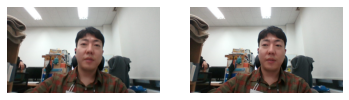

In [8]:

# 테스트 할 이미지 파일들
img1 = dlib.load_rgb_image('/content/drive/MyDrive/Notebooks/face/input/1/0.jpg')
img2 = dlib.load_rgb_image('/content/drive/MyDrive/Notebooks/face/input/1/1.jpg')
 
plotPairs(img1, img2)

In [10]:
img1_detection = detector(img1, 1)
img2_detection = detector(img2, 1)
 
img1_shape = sp(img1, img1_detection[0])
img2_shape = sp(img2, img2_detection[0])
 
#alignment
img1_aligned = dlib.get_face_chip(img1, img1_shape)
img2_aligned = dlib.get_face_chip(img2, img2_shape)

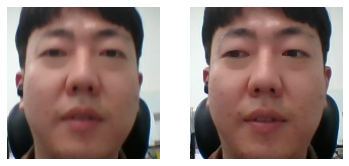

In [15]:
plotPairs(img1_aligned,img2_aligned)

In [16]:
img1_representation = facerec.compute_face_descriptor(img1_aligned)
img2_representation = facerec.compute_face_descriptor(img2_aligned)

In [17]:
img_repre = np.zeros((10,128))

img_repre[0] = facerec.compute_face_descriptor(img1_aligned)
img_repre[1] = facerec.compute_face_descriptor(img2_aligned)

In [18]:
img1_representation = np.array(img1_representation)
img2_representation = np.array(img2_representation)

In [19]:
distance = findEuclideanDistance(img1_representation, img2_representation)
threshold = 0.6 #distance threshold declared in dlib docs for 99.38% confidence score on LFW data set
 
if distance < threshold: print("they are same!,", "distance : ", distance)
else: print("they are different", "distance : ", distance)

they are same!, distance :  0.12918001965220688


In [20]:
img1_representation.size

128

In [22]:
img1_representation

array([-0.06291559,  0.05148215, -0.00347966,  0.00817019, -0.06519566,
       -0.09239063, -0.02158191, -0.12839273,  0.11782277, -0.0942307 ,
        0.18532132, -0.08314824, -0.20296691, -0.12079628, -0.04843768,
        0.16994822, -0.12343431, -0.13511431, -0.06738358,  0.01905569,
        0.1976378 ,  0.01160794, -0.01658015,  0.06463371, -0.11462639,
       -0.29766667, -0.11916296, -0.08141525,  0.03104168, -0.05255121,
       -0.02518215,  0.0343201 , -0.18216865, -0.08718809,  0.02841506,
        0.04342654, -0.00536608, -0.05616228,  0.20817786, -0.00459168,
       -0.23780635,  0.05905711,  0.01413532,  0.22668326,  0.15998876,
        0.05715635,  0.04013925, -0.16620229,  0.15039174, -0.14860564,
        0.03371716,  0.1633181 ,  0.10335921,  0.10371032, -0.00750391,
       -0.10079902,  0.0715223 ,  0.08597122, -0.16365433,  0.0358147 ,
        0.09752065, -0.1048957 , -0.01529935, -0.06324224,  0.16294204,
       -0.02801612, -0.09390202, -0.15091734,  0.12855676, -0.16

In [23]:
img2_representation

array([-0.08045411,  0.03916463,  0.02300247,  0.00812719, -0.07048094,
       -0.08218291, -0.01436749, -0.11938636,  0.09420578, -0.09716626,
        0.19378974, -0.07937725, -0.19247314, -0.11784162, -0.04604971,
        0.16508609, -0.12229471, -0.13877094, -0.06126897,  0.01901771,
        0.18812175,  0.00204719, -0.02484917,  0.05419663, -0.10546223,
       -0.2982834 , -0.11807749, -0.07980464,  0.03832312, -0.06778151,
       -0.02743273,  0.03154368, -0.16490638, -0.04914998,  0.01550255,
        0.04559701, -0.0063225 , -0.06576106,  0.20023485, -0.00746495,
       -0.23522398,  0.06672215, -0.00923789,  0.22567056,  0.16701259,
        0.05227448,  0.02771368, -0.16856331,  0.15687445, -0.16830818,
        0.02812746,  0.17450875,  0.08712696,  0.10321584, -0.0116531 ,
       -0.09064078,  0.07366025,  0.06300675, -0.16204968,  0.03070691,
        0.08171227, -0.10188289, -0.00526488, -0.088994  ,  0.17284372,
       -0.02091388, -0.11468953, -0.13409324,  0.12578076, -0.15

In [24]:
np.round(img1_representation*2048).astype(int)

array([-129,  105,   -7,   17, -134, -189,  -44, -263,  241, -193,  380,
       -170, -416, -247,  -99,  348, -253, -277, -138,   39,  405,   24,
        -34,  132, -235, -610, -244, -167,   64, -108,  -52,   70, -373,
       -179,   58,   89,  -11, -115,  426,   -9, -487,  121,   29,  464,
        328,  117,   82, -340,  308, -304,   69,  334,  212,  212,  -15,
       -206,  146,  176, -335,   73,  200, -215,  -31, -130,  334,  -57,
       -192, -309,  263, -340, -184,  115, -305, -352, -652,   18,  838,
        244, -486,  167, -121,   53,  346,  274,   80,   31, -232,   21,
        463, -204,  -41,  492,   81,  205,   76,   41, -109,   59, -118,
         23,  179,   -2,   29,  169, -205,  372,    3,  165,   16,  -17,
       -272, -110,  205, -344,  448,  280,   61,  169,  209,  247,  -75,
        -54, -477,  -81,  293,   25,  200,  -15])

In [25]:
np.round(img2_representation*2048).astype(int)

array([-165,   80,   47,   17, -144, -168,  -29, -245,  193, -199,  397,
       -163, -394, -241,  -94,  338, -250, -284, -125,   39,  385,    4,
        -51,  111, -216, -611, -242, -163,   78, -139,  -56,   65, -338,
       -101,   32,   93,  -13, -135,  410,  -15, -482,  137,  -19,  462,
        342,  107,   57, -345,  321, -345,   58,  357,  178,  211,  -24,
       -186,  151,  129, -332,   63,  167, -209,  -11, -182,  354,  -43,
       -235, -275,  258, -320, -166,  130, -330, -358, -606,   52,  871,
        248, -477,  144, -164,   39,  323,  298,   73,    2, -215,   37,
        458, -210,  -42,  494,   71,  241,   45,   48,  -74,   60,  -75,
         37,  157,  -28,   25,  179, -197,  399,    9,  189,   39,  -37,
       -248,  -81,  194, -385,  463,  298,   92,  156,  186,  238,  -93,
        -71, -472,  -42,  285,   10,  155,  -13])

In [26]:
np.round((img1_representation - img2_representation)*2048).astype(int)

array([ 36,  25, -54,   0,  11, -21, -15, -18,  48,   6, -17,  -8, -21,
        -6,  -5,  10,  -2,   7, -13,   0,  19,  20,  17,  21, -19,   1,
        -2,  -3, -15,  31,   5,   6, -35, -78,  26,  -4,   2,  20,  16,
         6,  -5, -16,  48,   2, -14,  10,  25,   5, -13,  40,  11, -23,
        33,   1,   8, -21,  -4,  47,  -3,  10,  32,  -6, -21,  53, -20,
       -15,  43, -34,   6, -20, -18, -15,  25,   6, -46, -33, -33,  -3,
        -9,  22,  43,  15,  23, -24,   8,  29, -18, -16,   4,   6,   1,
        -2,  10, -37,  31,  -7, -35,  -1, -43, -14,  22,  26,   3, -10,
        -8, -27,  -6, -24, -23,  20, -24, -30,  11,  41, -15, -18, -32,
        13,  23,   8,  18,  18,  -5, -39,   8,  15,  44,  -2])

In [27]:
import cv2

RGB_img = cv2.cvtColor(img1_aligned, cv2.COLOR_BGR2RGB)
#cv2.imwrite('face6.jpg', RGB_img)